In [1]:
from matplotlib import pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
import pandas as pd
import numpy as np

In [2]:
COL = pd.read_csv('../data/MERGED2009_PP.csv')

IOError: File ../data/MERGED2009_PP.csv does not exist

In [40]:
nonnullcolumns = ~COL.isnull().all()
cols = COL.columns[nonnullcolumns]

In [46]:
keep = cols[1:]

In [41]:
COL = COL[cols]

In [47]:
keep

Index([u'sch_deg', u'UNITID', u'INSTNM', u'TUITIONFEE_IN', u'TUITIONFEE_OUT',
       u'UGDS', u'mn_earn_wne_p10', u'ADM_RATE'],
      dtype='object')

In [42]:
[a for a in COL['INSTNM'] if 'davis' in a.lower()]

['Jefferson Davis Community College',
 'University of California-Davis',
 'Davis College',
 'Davis College',
 'Davis Applied Technology College',
 'Davis & Elkins College']

In [43]:
COL = COL.set_index('UNITID')

In [44]:
COL.head()

,Unnamed: 0,sch_deg,INSTNM,TUITIONFEE_IN,TUITIONFEE_OUT,UGDS,mn_earn_wne_p10,ADM_RATE
UNITID,,,,,,,,
100654,0,3.0,Alabama A & M University,4692.0,8638.0,4483.0,36600,0.4726
100663,1,3.0,University of Alabama at Birmingham,5096.0,11432.0,10265.0,48500,0.8357
100690,2,3.0,Amridge University,8000.0,8000.0,389.0,42800,0.8750
100706,3,3.0,University of Alabama in Huntsville,6510.0,15628.0,5956.0,51900,0.7209
100724,4,3.0,Alabama State University,6468.0,12084.0,4638.0,30700,0.4625


In [14]:
davisid = 110644
COL.loc[davisid]

sch_deg                                         3
INSTNM             University of California-Davis
TUITIONFEE_IN                               10003
TUITIONFEE_OUT                              32720
UGDS                                        24496
mn_earn_wne_p10                             67000
ADM_RATE                                   0.5257
Name: 110644, dtype: object

<h2>plot</h2>

In [49]:
n = len(COL)
t=0
years = ['0' + str(i) for i in range(10)] + [str(i) for i in range(10,14)]
for t in range(len(years)):
    i = years[t]
    COLtemp = pd.read_csv('../data/MERGED20'+i+'_PP.csv')
    COLtemp = COLtemp[keep]
    COLtemp.to_csv('../data/MERGED20'+i+'_PP.csv')
    COLtemp = COLtemp[COLtemp['sch_deg'] == 3.0][['UNITID','INSTNM','TUITIONFEE_IN','TUITIONFEE_OUT']]
    COLtemp = COLtemp.set_index('UNITID')
    if t==0:
        TUIT = COLtemp
    else:
        TUIT = TUIT.join(COLtemp[['TUITIONFEE_IN','TUITIONFEE_OUT']],how='left',rsuffix=i)

In [50]:
TUIT.head()

,INSTNM,TUITIONFEE_IN,TUITIONFEE_OUT,TUITIONFEE_IN01,TUITIONFEE_OUT01,TUITIONFEE_IN02,TUITIONFEE_OUT02,TUITIONFEE_IN03,TUITIONFEE_OUT03,TUITIONFEE_IN04,...,TUITIONFEE_IN09,TUITIONFEE_OUT09,TUITIONFEE_IN10,TUITIONFEE_OUT10,TUITIONFEE_IN11,TUITIONFEE_OUT11,TUITIONFEE_IN12,TUITIONFEE_OUT12,TUITIONFEE_IN13,TUITIONFEE_OUT13
UNITID,,,,,,,,,,,,,,,,,,,,,
100654,ALABAMA A & M UNIVERSITY,4664.0,5200.0,4664.0,5200.0,3040.0,5560.0,3352.0,6184.0,4420.0,...,4692.0,8638.0,5800.0,10672.0,6828.0,12156.0,7182.0,12774.0,NaN,NaN
100663,UNIVERSITY OF ALABAMA AT BIRMINGHAM,3363.0,6183.0,3640.0,6610.0,3880.0,7810.0,4274.0,9494.0,4662.0,...,5096.0,11432.0,5806.0,13198.0,6264.0,14256.0,6798.0,15462.0,NaN,NaN
100690,SOUTHERN CHRISTIAN UNIVERSITY,NaN,NaN,NaN,NaN,8960.0,8960.0,9440.0,9440.0,10040.0,...,8000.0,8000.0,8360.0,8360.0,8720.0,8720.0,6800.0,6800.0,NaN,NaN
100706,UNIVERSITY OF ALABAMA IN HUNTSVILLE,3112.0,6516.0,3536.0,7430.0,3764.0,7940.0,4126.0,8702.0,4516.0,...,6510.0,15628.0,7492.0,17986.0,8094.0,19424.0,8794.0,21108.0,NaN,NaN
100724,ALABAMA STATE UNIVERSITY,2520.0,5040.0,2904.0,5808.0,2904.0,5808.0,3600.0,7200.0,4008.0,...,6468.0,12084.0,7164.0,13476.0,8082.0,14394.0,7932.0,14244.0,NaN,NaN


In [17]:
TUIT = TUIT.iloc[:,0:27].dropna(axis=0)

In [18]:
TOP = TUIT[COL['UGDS'] > 10000]

c:\python27\lib\site-packages\ipykernel\__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


In [19]:
TOP.shape

(221, 27)

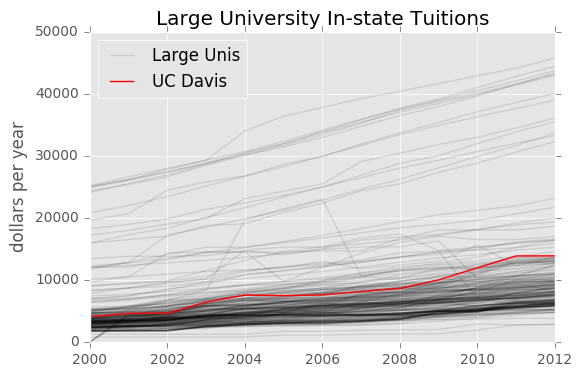

In [20]:
for c in range(len(TOP)):
    if c==0:
        plt.plot(['20'+y for y in years[:13]],np.array(TOP.iloc[c,1::2].map(float)),'k',alpha=.1,label="Large Unis")
    plt.plot(['20'+y for y in years[:13]],np.array(TOP.iloc[c,1::2].map(float)),'k',alpha=.1)
plt.plot(['20'+y for y in years[:13]],np.array(TOP.loc[davisid].iloc[1::2].map(float)),'r',label="UC Davis")
plt.title('Large University In-state Tuitions')
plt.ylabel('dollars per year')
plt.legend(loc = 2)
plt.show()

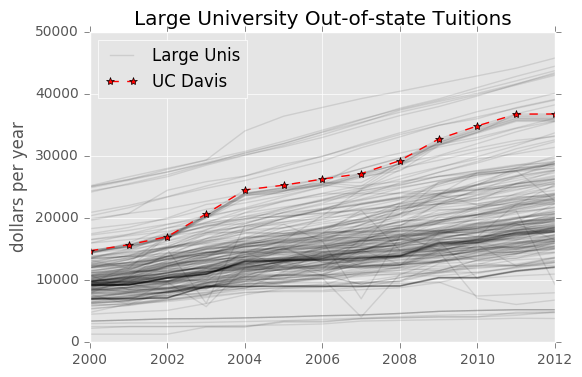

In [21]:
for c in range(len(TOP)):
    if c==0:
        plt.plot(['20'+y for y in years[:13]],np.array(TOP.iloc[c,2::2].map(float)),'k',alpha=.1,label="Large Unis")
    plt.plot(['20'+y for y in years[:13]],np.array(TOP.iloc[c,2::2].map(float)),'k',alpha=.1)
plt.plot(['20'+y for y in years[:13]],np.array(TOP.loc[davisid].iloc[2::2].map(float)),'r--',marker='*',label="UC Davis")
plt.title('Large University Out-of-state Tuitions')
plt.ylabel('dollars per year')
plt.legend(loc=2)
plt.show()

<h2>errorbar, stackplot</h2>

In [22]:
Y = TOP.iloc[:,1::2].applymap(float).mean(axis=0)
S = TOP.iloc[:,1::2].applymap(float).std(axis=0)
X = ['20'+y for y in years[:13]]

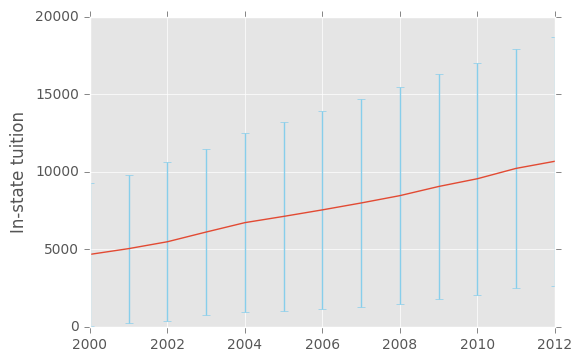

In [23]:
plt.errorbar(X,Y,yerr=S,ecolor="#87CEEB")
plt.ylabel('In-state tuition')
plt.show()

In [24]:
TOP = TUIT[COL['UGDS'] > 10000]
MID = TUIT[(COL['UGDS'] > 2000) & (COL['UGDS'] <= 10000)]
LOW = TUIT[COL['UGDS'] <= 2000]

c:\python27\lib\site-packages\ipykernel\__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
c:\python27\lib\site-packages\ipykernel\__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
c:\python27\lib\site-packages\ipykernel\__main__.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()


In [25]:
print TOP.shape, MID.shape, LOW.shape

(221, 27) (566, 27) (685, 27)


In [26]:
Ytop = TOP.iloc[:,1::2].applymap(float).mean(axis=0)
Ymid = MID.iloc[:,1::2].applymap(float).mean(axis=0)
Ylow = LOW.iloc[:,1::2].applymap(float).mean(axis=0)

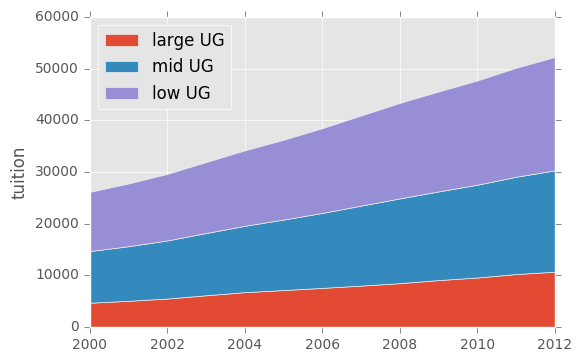

In [27]:
plt.stackplot(map(int,X),Ytop,Ymid,Ylow,labels=['large UG','mid UG','low UG'])
plt.ylabel('tuition')
plt.legend(loc=2)
plt.show()

Does this make sense? No, probably not.

<h2>scatter</h2>

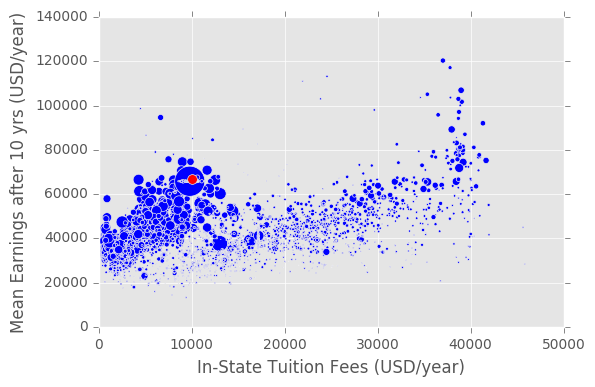

In [28]:
TVE = COL[['UGDS','TUITIONFEE_IN','mn_earn_wne_p10']].dropna(axis=0)
DAV = COL.loc[davisid][['UGDS','TUITIONFEE_IN','mn_earn_wne_p10']]
TVE = TVE[TVE['mn_earn_wne_p10']!='PrivacySuppressed']

plt.scatter(TVE.iloc[:,1],TVE.iloc[:,2],s=TVE.iloc[:,0]/500)
plt.scatter([DAV[1]],[float(DAV[2])],s=[DAV[0]/500],c='r')
plt.xlim([0,50000])
plt.xlabel('In-State Tuition Fees (USD/year)')
plt.ylabel('Mean Earnings after 10 yrs (USD/year)')
plt.show()

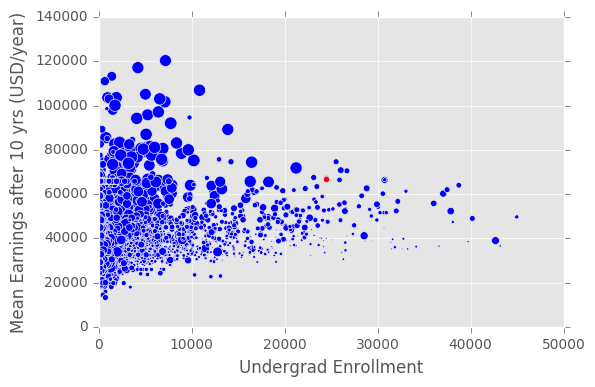

In [29]:
plt.scatter(TVE.iloc[:,0],TVE.iloc[:,2].map(float),s=TVE.iloc[:,1]/500)
plt.scatter([DAV[0]],[float(DAV[2])],s=[DAV[1]/500],c='r')
plt.xlim([0,50000])
plt.xlabel('Undergrad Enrollment')
plt.ylabel('Mean Earnings after 10 yrs (USD/year)')
plt.show()

In [30]:
COL.loc[davisid][['UGDS','TUITIONFEE_IN','mn_earn_wne_p10']]

UGDS               24496
TUITIONFEE_IN      10003
mn_earn_wne_p10    67000
Name: 110644, dtype: object

<h2>hist</h2>

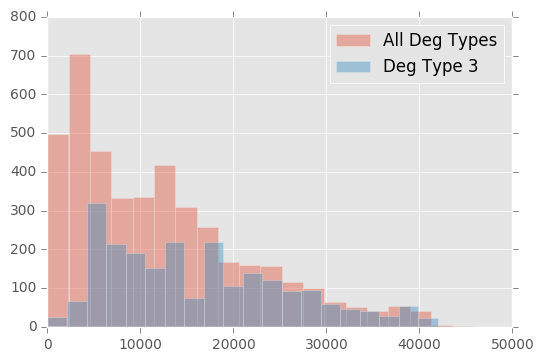

In [31]:
plt.hist(COL['TUITIONFEE_IN'].dropna(),bins=20,alpha=.4,label='All Deg Types')
plt.hist(COL[COL['sch_deg'] == 3.0]['TUITIONFEE_IN'].dropna(),bins=20,alpha=.4,label='Deg Type 3')
plt.legend()
plt.show()

<h2>bar, pie</h2>

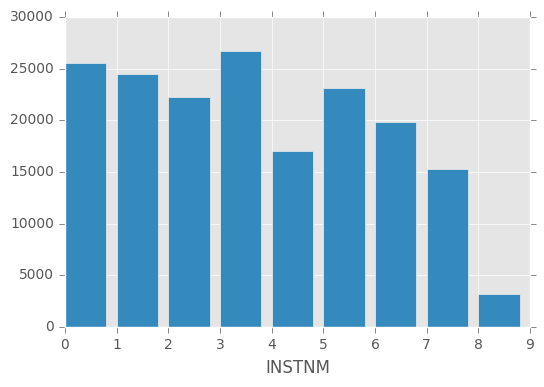

In [32]:
cal = ['university of california-' in a.lower() for a in COL['INSTNM']]
calenroll = COL[cal][['INSTNM','UGDS']].dropna()
plt.xlabel('INSTNM')
plt.bar(range(len(calenroll)),calenroll['UGDS'])
plt.show()

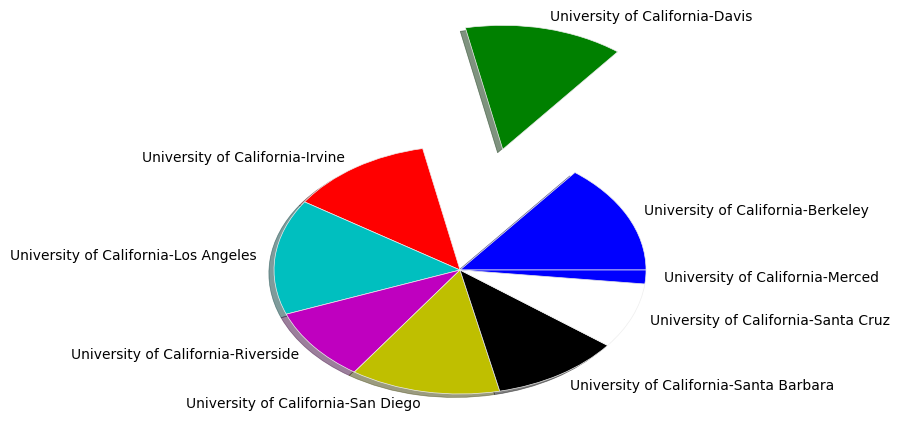

In [33]:
expl = [0]*len(calenroll)
expl[1]=1
plt.pie(calenroll['UGDS'],labels=calenroll['INSTNM'],explode=expl,shadow=True)
plt.show()

<h2>boxplot</h2>

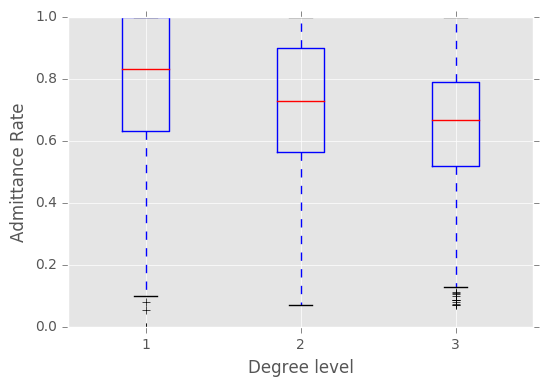

In [34]:
adm = [X['ADM_RATE'].dropna() for deg, X in COL.groupby('sch_deg')]
plt.boxplot(adm)
plt.xlabel('Degree level')
plt.ylabel('Admittance Rate')
plt.show()

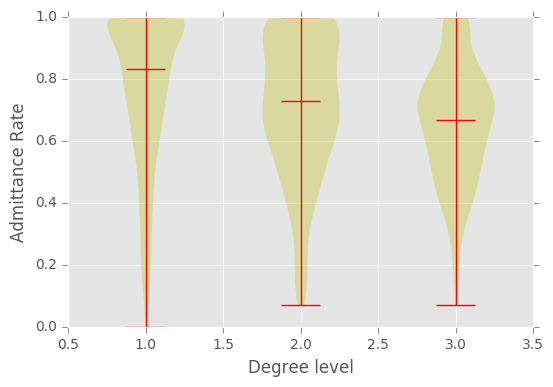

In [35]:
adm = [X['ADM_RATE'].dropna() for deg, X in COL.groupby('sch_deg')]
plt.violinplot(adm,showmedians=True)
plt.xlabel('Degree level')
plt.ylabel('Admittance Rate')
plt.show()

In [36]:
COL.loc[davisid]['ADM_RATE']

0.52569999999999995

<h2>Subplots</h2>

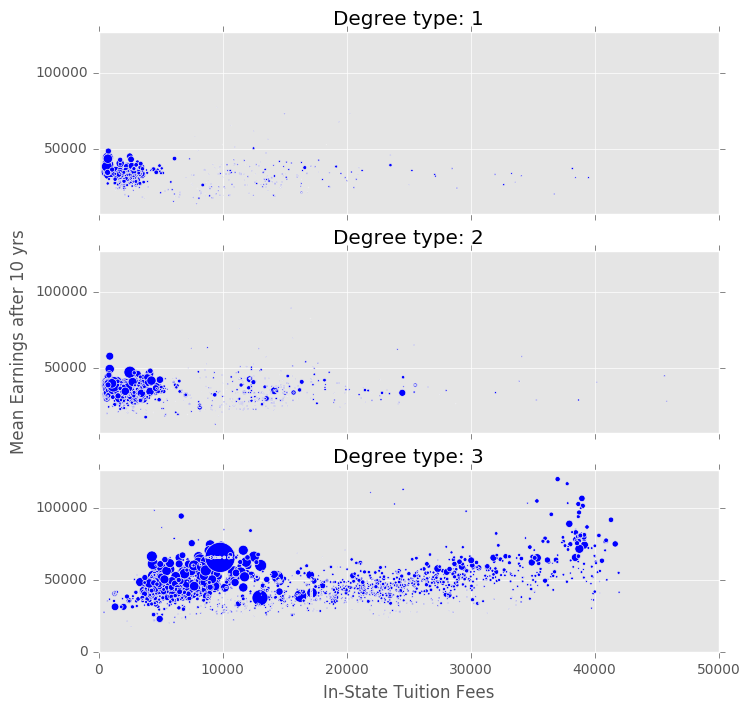

In [37]:
f, axarr = plt.subplots(3, sharex=True, sharey=True, figsize=(8,8))
TVE = COL[['UGDS','TUITIONFEE_IN','mn_earn_wne_p10','sch_deg']].dropna(axis=0)
TVE = TVE[TVE['mn_earn_wne_p10']!='PrivacySuppressed']
for i in range(3):
    TVEt = TVE[TVE['sch_deg'] == i+1]
    axarr[i].scatter(TVEt.iloc[:,1],TVEt.iloc[:,2],s=TVEt.iloc[:,0]/500)
    axarr[i].set_xlim([0,50000])
    axarr[i].set_yticks([0,50000,100000])
    axarr[i].set_title('Degree type: ' + str(i+1))
    if i == 1:
        axarr[i].set_ylabel('Mean Earnings after 10 yrs')
#f.subplots_adjust(hspace=0)
plt.xlabel('In-State Tuition Fees')
plt.savefig('earningsbytuition.png',format='png')
plt.show()